# DESI-347 v12 to v13

Study changes to DESIMODEL after updating from DESI-347 v12 to v13.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os

In [3]:
import astropy.table

Compare v12 and v13 throughputs, which have only changed due to updated final corrector coating data.  The table compares values of the effective bandpass, defined as integrated throughput in Angstroms.

| version | b total | r total | z total |
|---------|---------|---------|---------|
| v13     |  852.6A |  821.5A | 1022.2A |
| v12     |  872.0A |  846.2A | 1062.9A |


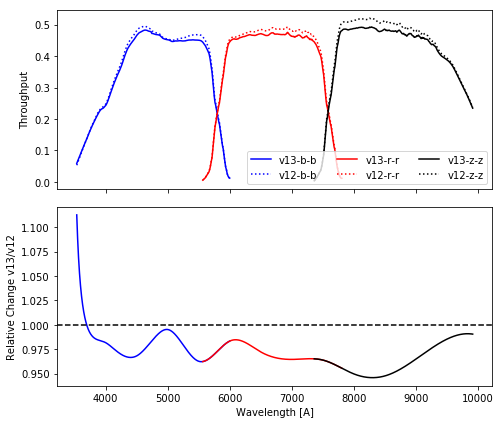

In [4]:
def compare(old_data='/Users/david/Cosmo/DESI/code/desimodel-git/data.v12'):
    new_data = os.path.join(os.getenv('DESIMODEL'), 'data')
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(7, 6))
    wlen, throughput, extinction, fiberinput = {}, {}, {}, {}    
    for band, color in zip('brz', 'brk'):
        for version, path, ls in zip(('v13', 'v12'), (new_data, old_data), ('-', ':')):
            label=f'{version}-{band}'
            table = astropy.table.Table.read(os.path.join(path, 'throughput', f'thru-{band}.fits'), hdu=1)
            wlen[label] = np.array(table['wavelength'])
            throughput[label] = np.asarray(table['throughput'])
            extinction[label] = np.asarray(table['extinction'])
            fiberinput[label] = np.asarray(table['fiberinput'])                                           
            ax[0].plot(wlen[label], throughput[label], ls=ls, c=color, label=f'{label}-{band}')
        # Check that only the throughput arrays have changed.
        assert np.array_equal(wlen[f'v12-{band}'], wlen[f'v13-{band}'])
        assert np.array_equal(extinction[f'v12-{band}'], extinction[f'v13-{band}'])
        assert np.array_equal(fiberinput[f'v12-{band}'], fiberinput[f'v13-{band}'])
        # Plot relative changes in throughput.
        rel = throughput[f'v13-{band}'] / throughput[f'v12-{band}']
        ax[1].plot(wlen[label], rel, color=color, label=band)
    # Print median throughput in each band.
    print('| version | b total | r total | z total |')
    print('|---------|---------|---------|---------|')
    for version in 'v13', 'v12':
        print(f'| {version:7s} ', end='')
        for band in 'brz':
            label=f'{version}-{band}'
            total = np.trapz(throughput[label], wlen[label])
            print(f'| {total:6.1f}A ', end='')
        print('|')
    ax[0].legend(ncol=3)
    ax[0].set_ylabel('Throughput')
    ax[1].set_ylabel('Relative Change v13/v12')
    ax[1].set_xlabel('Wavelength [A]')
    ax[1].axhline(1, ls='--', c='k')
    plt.tight_layout()
    plt.savefig('throughput-v13.png')
            
compare()